
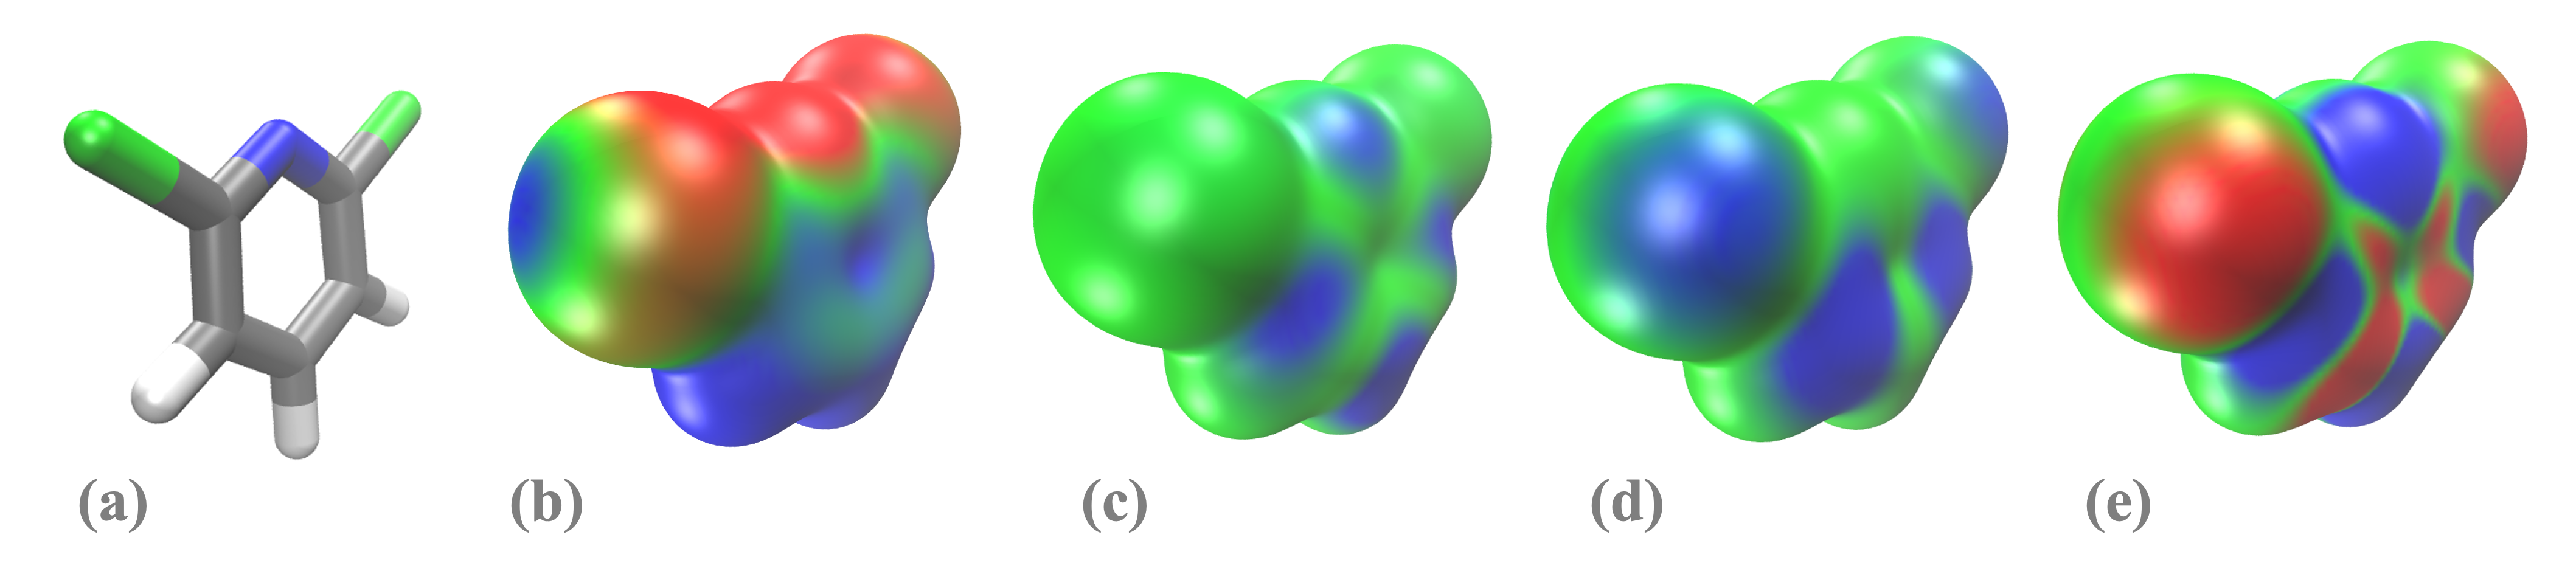

**2,6-Dichloropyridine through the lens of CDFT.** 

The **a)** chemical structure, **b)** electrostatic potential, **c)** $f^{+}(\mathbf{r})$ (nucleophilic attack), **d)** $f^{-}(\mathbf{r})$ (electrophilic attack), and **e)** dual descriptor. The (b)-(e) properties are used to color the $\rho(\mathbf{r})=0.002$  a.u. isosurface of 2,6-dichloropyridine where the colors blue, green, and red denote positive, zero, and negative values, respectively. The properties in (c)-(e) are computed using a frontier molecular orbital theory approach; all calculations are done at B3LYP/aug-cc-pVDZ level of theory.

**Published:** Conceptual Density Functional Theory (book chapter); F. De Proft, P. Geerlings, F. Heidar-Zadeh, P. Ayers

# b) Electrostatic Potential (ESP)

> Compute ESP and visualize it on electron density iso-surface.
>
> See [Molecule.compute_density](https://chemtools.org/modules/generated/chemtools.wrappers.molecule.Molecule.html#chemtools.wrappers.molecule.Molecule.compute_density) and [Molecule.compute_esp](https://chemtools.org/modules/generated/chemtools.wrappers.molecule.Molecule.html#chemtools.wrappers.molecule.Molecule.compute_esp)

In [ ]:
from chemtools import  UniformGrid, Molecule, print_vmd_script_isosurface

# 1. Build Molecule & make Cube

mol = Molecule.from_file("data/dichloropyridine26_q+0.fchk")
cub = UniformGrid.from_molecule(mol, spacing=0.2, extension=5.0)

# 2. Generate cube files for various properties

cub.generate_cube("dichloropyridine26_q+0_rho.cube", mol.compute_density(cub.points))
cub.generate_cube("dichloropyridine26_q+0_esp.cube", mol.compute_esp(cub.points))

# 3. Generate vmd script

print_vmd_script_isosurface("dichloropyridine26_q+0.vmd",
                            "dichloropyridine26_q+0_rho.cube", 
                            colorfile="dichloropyridine26_q+0_esp.cube",
                            isosurf=0.002,
                            scalemin=-0.02,
                            scalemax=0.02)

# c & d) Nucleophilic & Electrophilic Attacks:  $f^+(\mathbf{r})$ & $f^-(\mathbf{r})$

> Compute Fukui function plus and minus based on linear energy model using
frontier molecular orbital (FMO) approach and visualize it on electron density iso-surface.
>
> [LinearLocalTool.ff_plus](https://chemtools.org/modules/generated/chemtools.conceptual.linear.LinearLocalTool.html#chemtools.conceptual.linear.LinearLocalTool.ff_plus) & [LinearLocalTool.ff_minus](https://chemtools.org/modules/generated/chemtools.conceptual.linear.LinearLocalTool.html#chemtools.conceptual.linear.LinearLocalTool.ff_minus)

In [ ]:
from chemtools import LocalConceptualDFT, UniformGrid, print_vmd_script_isosurface, Molecule

# 1. Build Molecule & make Cube

mol = Molecule.from_file("data/dichloropyridine26_q+0.fchk")
cub = UniformGrid.from_molecule(mol, spacing=0.2, extension=5.0)

# 2. Build linear energy model using FMO approach.

tool = LocalConceptualDFT.from_file(file_path, model="linear", points=cub.points)

# 3. Generate cube files for various properties

cube.generate_cube("dichloropyridine26_dens.cube", mol.compute_density(cub.points))
cube.generate_cube("dichloropyridine26_ffp.cube", tool.ff_plus)
cube.generate_cube("dichloropyridine26_ffm.cube", tool.ff_minus)

# 4. Generate vmd script

print_vmd_script_isosurface("dichloropyridine26_ffp.vmd",
                            "dichloropyridine26_dens.cube",
                            colorfile="dichloropyridine26_ffp.cube",
                            isosurf=0.002,
                            scalemin=-0.0005, scalemax=0.0005)

print_vmd_script_isosurface("dichloropyridine26_ffm.vmd",
                            "dichloropyridine26_dens.cube",
                            colorfile="dichloropyridine26_ffm.cube",
                            isosurf=0.002,
                            scalemin=-0.0002, scalemax=0.0002)

# e) Dual Descriptor (Frontier MO)

> Compute dual descriptor based on the quadratic energy model using
frontier molecular orbital (FMO) approach and visualize it on electron density iso-surface.
>
> See [QuadraticLocalTool.dual_descriptor](https://chemtools.org/modules/generated/chemtools.conceptual.quadratic.QuadraticLocalTool.html#chemtools.conceptual.quadratic.QuadraticLocalTool.dual_descriptor)

In [ ]:
from chemtools import LocalConceptualDFT, UniformGrid, print_vmd_script_isosurface, Molecule

# 1. Build Molecule & make Cube

mol = Molecule.from_file("data/dichloropyridine26_q+0.fchk")
cub = UniformGrid.from_molecule(mol, spacing=0.2, extension=5.0)

# 2. Build quadratic energy model using FMO approach.

tool = LocalConceptualDFT.from_file("data/dichloropyridine26_q+0.fchk", model="quadratic", points=cub.points)

# 3. Generate cube files for various properties

cube.generate_cube("dichloropyridine26_dens.cube", mol.compute_density(cub.points))
cube.generate_cube("dichloropyridine26_dual.cube", tool.dual_descriptor)

# 4. Generate vmd script

print_vmd_script_isosurface("dichloropyridine26_dual.vmd",
                            "dichloropyridine26_dens.cube",
                            colorfile="dichloropyridine26_dual.cube",
                            isosurf=0.002,
                            scalemin=-0.0001,
                            scalemax=0.0001)